week1 objectives:
1. collect news stories on any one topic among; climate change, gun control, abortion, immigration
2. transcript news stories
3. segment audio among; speech, no-speech, noise, music
4. plot distribution of segments

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import json

In [2]:
%pip install -q inaSpeechSegmenter

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install whisper

# pip install -q git+https://github.com/openai/whisper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 921.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=626dacc46bed1f7deae31fe58a5c6153db1675a3454a14bfc74c505dd2968755
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9a3508cb14b6
Successfully built whisper


In [2]:
import torch
import whisper

device = "cuda" if torch.cuda.is_available() else "cpu"

model = whisper.load_model("large").to(device)


100%|█████████████████████████████████████| 2.87G/2.87G [01:04<00:00, 48.1MiB/s]


In [5]:
path = "stories/"

transcripts = {}

In [6]:
for i in os.listdir(path):
    text = model.transcribe(os.path.join(path, i))

    transcripts[i] = text["segments"]

# dump raw
with open("meta/transcript.json", 'w') as f:
    json.dump(transcripts, f, indent=4)


In [4]:
def get_sentences(segments):
    '''
    merge segments to sentences
    '''
    sentences, temp = [], ""

    for _, i  in enumerate(segments):
        # with period
        if not len(temp) and "." in i['text']:
            
            sentences.append({
                'text': i['text'].strip(),
                'start': round(i['start'], 2),
                'end': round(i['end'], 2)
            }) 
            
            continue
        # first condition fails
        elif not len(temp):

            temp, start = i['text'], round(i['start'], 2)

            continue

        temp += i['text']

        if "." in i['text']:

            sentences.append({
                'text': temp.strip(),
                'start': start,
                'end': round(i['end'], 2)
            })
            temp = ""
    
    return sentences


In [8]:
# fetch sentences
with open("meta/transcript.json") as f:
    text = json.load(f)
 
data = get_sentences(text['de_fnc.mp4'])

In [9]:
data[ : 5]

[{'text': 'Good evening and welcome to Tucker Carlson tonight.',
  'start': 0.0,
  'end': 3.56},
 {'text': "If there's one thing your average liberal understands perfectly well, it's that there's safety in numbers.",
  'start': 3.56,
  'end': 10.08},
 {'text': "Don't go out alone.", 'start': 10.08, 'end': 11.48},
 {'text': 'Bring 80 million people with you.', 'start': 11.48, 'end': 13.28},
 {'text': "It's safer that way.", 'start': 13.28, 'end': 15.2}]

In [2]:
# audio segments
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv

import seaborn as sns


In [3]:
segmenter = Segmenter(detect_gender=False)

segments = segmenter("stories/de_fnc.mp4")

1183/1183 - 15s - 15s/epoch - 13ms/step


In [4]:
segments[ : 5]

[('music', 0.0, 1.06),
 ('speech', 1.06, 9.3),
 ('noEnergy', 9.3, 9.9),
 ('speech', 9.9, 14.200000000000001),
 ('noEnergy', 14.200000000000001, 15.120000000000001)]

In [4]:
seg2csv(segments, "meta/segment.csv")

In [5]:
dist = {'noEnergy': [], 'speech': [], 'music': [], 'noise': []}

for i in segments:
    dist[i[0]].append(i[2] - i[1])

In [10]:
# distribution plot for duration of pauses
sns.set_style('whitegrid')

def plot_dist(col):
    sns.displot(dist[col], kde = False, color ='red', bins = 50)
    

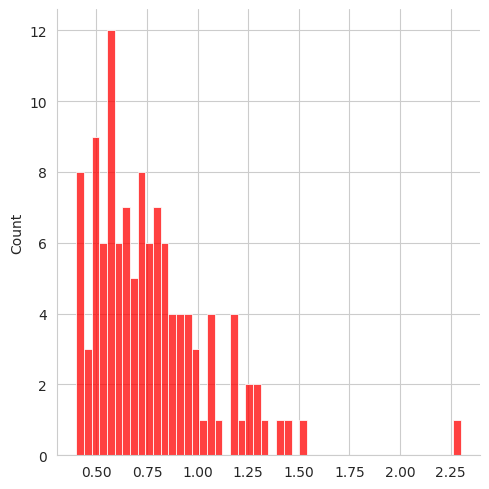

In [11]:
plot_dist("noEnergy")

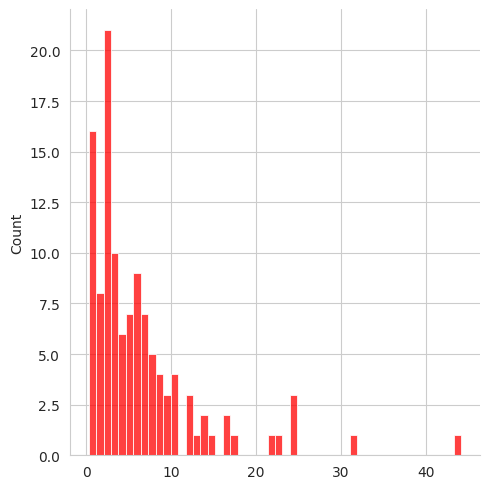

In [12]:
plot_dist("speech")

main: to check if there is a consistency among lengths of speech segments, to use timestamps for segmenting.

due to irregularity in lengths, discarded